In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd 
iris = pd.read_csv("iris2.csv")
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145,6.7,3.3,5.7,2.5,Iris-virginica
25,26,5.0,3.0,1.6,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
53,54,5.5,2.3,4.0,1.3,Iris-versicolor


In [3]:
%matplotlib inline 

In [4]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
print (iris.median())
iris["SepalLengthCm"]=iris["SepalLengthCm"].fillna( 5.80)
iris["SepalWidthCm"]=iris["SepalWidthCm"].fillna( 3.00)
iris["PetalLengthCm"]=iris["PetalLengthCm"].fillna(4.35)
iris["PetalWidthCm"]=iris["PetalWidthCm"].fillna(1.30)
iris.head()
iris.tail()


Id               76.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,Iris-virginica
148,149,6.2,3.4,5.40,2.3,Iris-virginica
149,150,5.9,3.0,5.10,1.8,Iris-virginica
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris["Species"]= label_encoder.fit_transform(iris["Species"])
iris["Species"]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int32

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [7]:
iris.corr()
#no variables are to be dropped.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [8]:
iris.var()
#no independent variable has a variance <0.1

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025678383A20>,
      dtype=object)

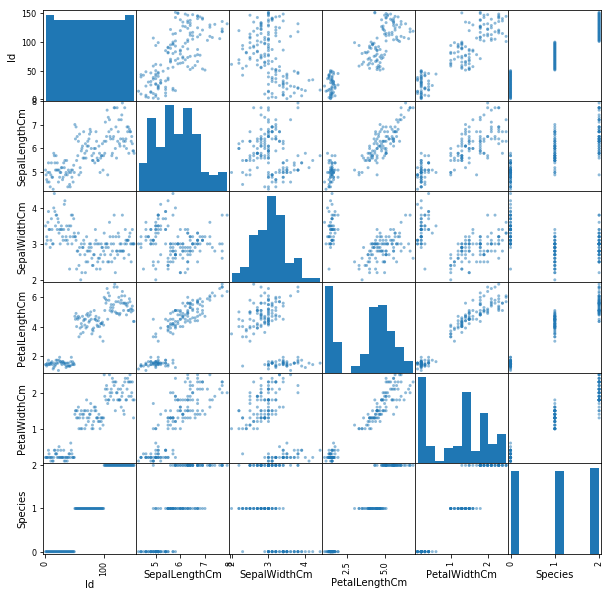

In [9]:
pd.scatter_matrix(iris, figsize=(10, 10))

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [10]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
X= iris.drop("Species",axis=1)
y= iris["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

### Question 11: Read the data given in bc2.csv file

In [11]:
bc2= pd.read_csv("bc2.csv")
bc2.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Question 12: Observe the no.of records in dataset and type of each feature 

In [12]:
print (bc2.shape)
bc2.dtypes

(699, 11)


ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

In [13]:
bc2.describe(include='all')


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


### Check Missing Values

In [14]:
bc2.isnull().values.any()

False

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [15]:
sum(bc2["Bare Nuclei"]=='?')




16

In [16]:
bc2["Bare Nuclei"]=bc2["Bare Nuclei"].replace('?', np.nan)
bc2["Bare Nuclei"]=bc2["Bare Nuclei"].fillna(1)


In [17]:
sum(bc2["Bare Nuclei"]==1)


16

### Question 15: Find the distribution of target variable (Class) 

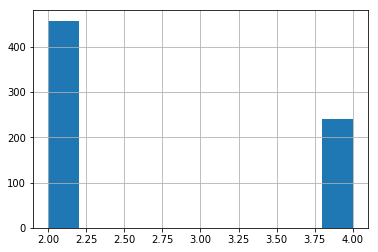

In [18]:
bc2['Class'].hist()

#### Plot the distribution of target variable using histogram

### convert the datatype of Bare Nuclei to `int`

In [19]:
bc2["Bare Nuclei"]=bc2["Bare Nuclei"].astype("int")
bc2.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

### Question 16: Standardization of Data

In [20]:
from scipy.stats import zscore
bc2 = bc2.apply(zscore)

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002567B0EFF98>,
      dtype=object)

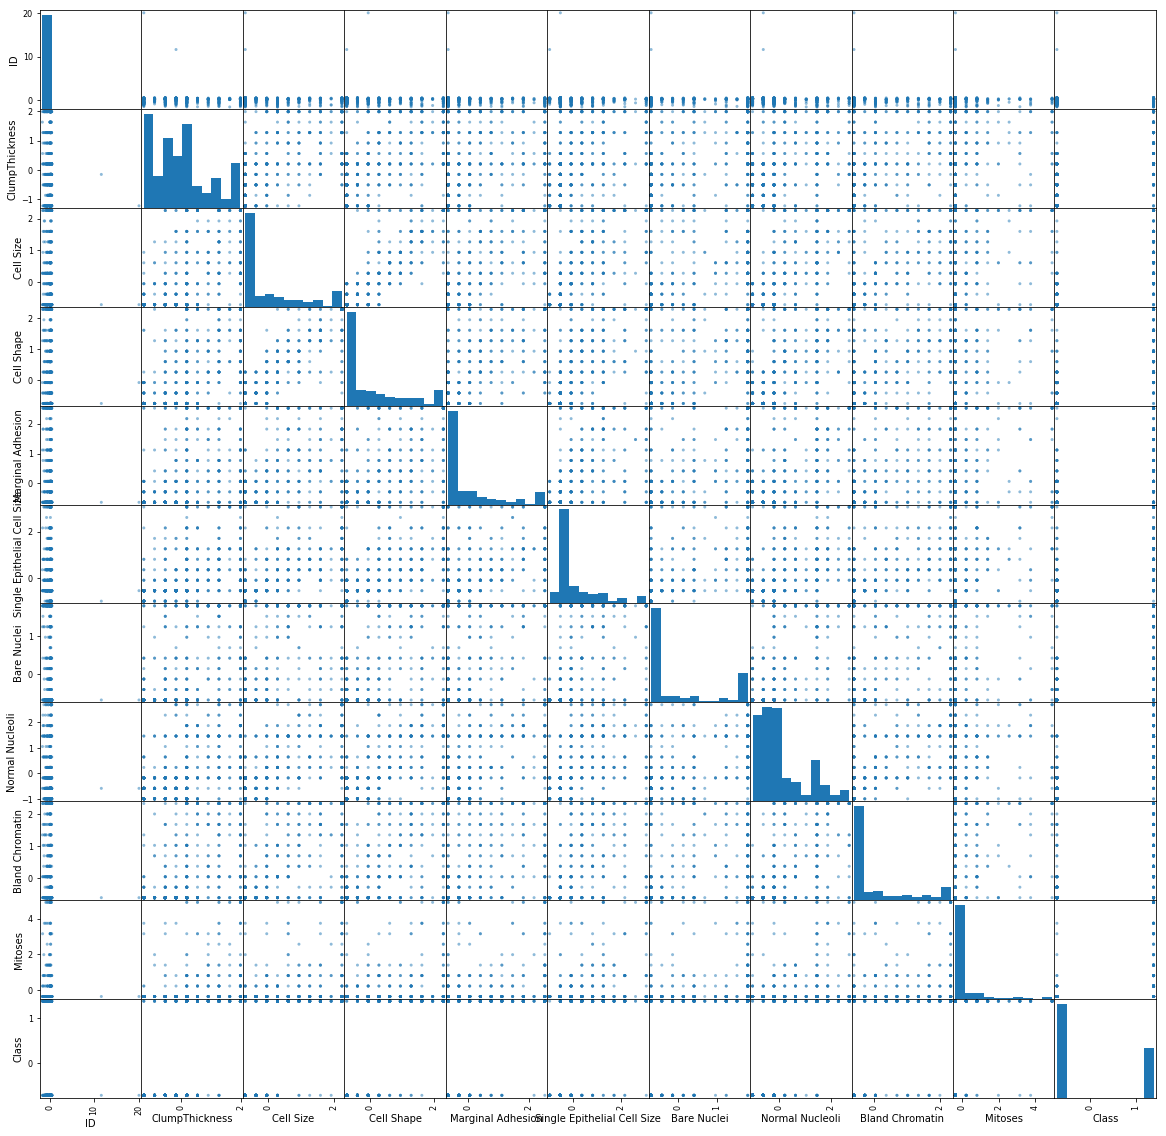

In [21]:
pd.scatter_matrix(bc2, figsize=(20, 20))
#cell shape and cell size is collinear.

In [22]:
bc2.drop(["Cell Shape"],axis=1)

,ID,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
5,-0.088513,1.273138,2.251526,1.820022,1.710106,1.799664,2.282766,1.354454,-0.343912,1.378555
6,-0.086929,-1.214667,-0.699995,-0.633247,-0.549561,1.799664,-0.179662,-0.611825,-0.343912,-0.725397
7,-0.086180,-0.859266,-0.699995,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
8,-0.062638,-0.859266,-0.699995,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,1.990014,-0.725397
9,-0.062638,-0.148465,-0.372048,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912,-0.725397


### Question 18: Divide the dataset into feature set and target set

### Divide the Training and Test sets in 70:30 

## Question 19 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

### Question 20: Print the optimal number of neighbors